In [1]:
from geopy.geocoders import Nominatim
import pandas as pd
import numpy
import folium

In [2]:

emigration_2023_df = pd.read_csv('emigration 2023.csv', header=None, encoding='ISO-8859-1')
emigration_2023_df.columns = ['Citizenship', 'Destination Country', 'Emigrant Count']
emigration_2023_df = emigration_2023_df[emigration_2023_df['Emigrant Count'] != 0]
emigration_2023_df = emigration_2023_df[emigration_2023_df['Destination Country'].str.lower() != 'not stated']
emigration_2023_df = emigration_2023_df[emigration_2023_df['Citizenship'].str.lower() != 'not stated']
emigration_2023_df = emigration_2023_df[emigration_2023_df['Citizenship'].str.lower() != 'stateless']
# Drop rows where the 'Citizenship' is the same as the 'Destination Country'
emigration_2023_df = emigration_2023_df[emigration_2023_df['Citizenship'].str.lower() != emigration_2023_df['Destination Country'].str.lower()]


# Reset the index to avoid gaps after dropping rows
emigration_2023_df = emigration_2023_df.reset_index(drop=True)





In [3]:
emigration_2023_df

,Citizenship,Destination Country,Emigrant Count
0,Albania,Greece,1
1,Albania,Norway,1
2,Albania,Spain,1
3,Albania,Sweden,3
4,Belarus,Lithuania,2
...,...,...,...
1710,New Zealand,Serbia,1
1711,New Zealand,United Kingdom,1
1712,New Zealand,Germany,2
1713,New Zealand,USA,4


In [5]:


# Group by destination country and sum the emigrant count
destination_ranking = emigration_2023_df.groupby('Destination Country')['Emigrant Count'].sum().reset_index()

# Sort by emigrant count in descending order (highest emigration first)
destination_ranking = destination_ranking.sort_values(by='Emigrant Count', ascending=False)

destination_ranking = destination_ranking.reset_index(drop=True)


# Display the top destination countries
print(destination_ranking)

# If you want to save it to a CSV file
#destination_ranking.to_csv('destination_ranking.csv', index=False)


     Destination Country  Emigrant Count
0                Germany             800
1                 Sweden             731
2         United Kingdom             579
3                    USA             551
4                  Spain             474
..                   ...             ...
141             Tanzania               1
142  Trinidad and Tobago               1
143               Uganda               1
144           Uzbekistan               1
145            Venezuela               1

[146 rows x 2 columns]


In [8]:
# Load the destination ranking data from your CSV file
destination_ranking_df = pd.read_csv('destination_ranking.csv')

# Get the top 100 destinations based on Emigrant Count
top_100_destinations = destination_ranking_df.head(100)

# Predefined coordinates for top 100 countries
country_coordinates = {
    'Germany': [51.1657, 10.4515],
    'Sweden': [60.1282, 18.6435],
    'United Kingdom': [55.3781, -3.4360],
    'USA': [37.0902, -95.7129],
    'Spain': [40.4637, -3.7492],
    'France': [46.6034, 1.8883],
    'Norway': [60.4720, 8.4689],
    'Italy': [41.8719, 12.5674],
    'Netherlands': [52.1326, 5.2913],
    'Denmark': [56.2639, 9.5018],
    'Switzerland': [46.8182, 8.2275],
    'Australia': [-25.2744, 133.7751],
    'Belgium': [50.8503, 4.3517],
    'Canada': [56.1304, -106.3468],
    'Austria': [47.5162, 14.5501],
    'New Zealand': [-40.9006, 174.8860],
    'Finland': [61.9241, 25.7482],
    'Japan': [36.2048, 138.2529],
    'Ireland': [53.4129, -8.2439],
    'Portugal': [39.3999, -8.2245],
    'China': [35.8617, 104.1954],
    'South Korea': [35.9078, 127.7669],
    'Poland': [51.9194, 19.1451],
    'Brazil': [-14.2350, -51.9253],
    'Argentina': [-38.4161, -63.6167],
    'Mexico': [23.6345, -102.5528],
    'Russia': [61.5240, 105.3188],
    'Greece': [39.0742, 21.8243],
    'Turkey': [38.9637, 35.2433],
    'South Africa': [-30.5595, 22.9375],
    'Thailand': [15.8700, 100.9925],
    'Singapore': [1.3521, 103.8198],
    'Malaysia': [4.2105, 101.9758],
    'India': [20.5937, 78.9629],
    'Philippines': [12.8797, 121.7740],
    'Indonesia': [-0.7893, 113.9213],
    'Chile': [-35.6751, -71.5430],
    'Israel': [31.0461, 34.8516],
    'Egypt': [26.8206, 30.8025],
    'Morocco': [31.7917, -7.0926],
    'Vietnam': [14.0583, 108.2772],
    'Saudi Arabia': [23.8859, 45.0792],
    'United Arab Emirates': [23.4241, 53.8478],
    'Iceland': [64.9631, -19.0208],
    'Luxembourg': [49.8153, 6.1296],
    'Monaco': [43.7384, 7.4246],
    'Liechtenstein': [47.1660, 9.5554],
    'Estonia': [58.5953, 25.0136],
    'Latvia': [56.8796, 24.6032],
    'Lithuania': [55.1694, 23.8813],
    # Add more coordinates as needed
}

# Initialize the Folium map centered on Denmark
m = folium.Map(location=[56.26392, 9.501785], zoom_start=4)

# Normalize the emigrant count for scaling marker size
max_count = top_100_destinations['Emigrant Count'].max()
min_count = top_100_destinations['Emigrant Count'].min()

# Function to get normalized size
def get_marker_size(count):
    # Scale marker size (min size: 5, max size: 20)
    return 5 + 15 * (count - min_count) / (max_count - min_count)

# Loop through the top 100 destinations and add markers
for _, row in top_100_destinations.iterrows():
    destination = row['Destination Country']
    emigrant_count = row['Emigrant Count']
    
    # Get coordinates from predefined list
    location = country_coordinates.get(destination, [0, 0])
    
    # If location is valid (not [0,0]), add marker
    if location != [0, 0]:
        folium.CircleMarker(
            location=location,
            radius=get_marker_size(emigrant_count),  # Size based on emigrant count
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{destination}: {emigrant_count} emigrants"
        ).add_to(m)

# Save the map to an HTML file
m.save('top_100_destinations_map.html')


In [23]:
import numpy as np
# Path to the GeoJSON file for country boundaries
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Create a mapping of country names to align them with GeoJSON names
country_name_mapping = {
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'Russia': 'Russian Federation',
    # Add other mappings as needed...
}

# Apply the mapping to your data
destination_ranking_df['Destination Country'] = destination_ranking_df['Destination Country'].replace(country_name_mapping)

# Initialize the Folium map centered on Denmark
m = folium.Map(location=[56.26392, 9.501785], zoom_start=1)

# Define threshold scale based on standard deviations, ensuring strict monotonicity
threshold_scale = [
    0,  # Minimum threshold
    max(1, mean - std_dev),  # At least 1 emigrant, avoid negative or too small values
    mean,  # Mean threshold
    mean + std_dev,  # 1 standard deviation above the mean
    mean + 2 * std_dev,  # 2 standard deviations above the mean
    destination_ranking_df['Emigrant Count'].max()  # Max value from the data
]

# Ensure that threshold values are strictly increasing
threshold_scale = sorted(list(set(threshold_scale)))

# Add Choropleth layer for countries, using Emigrant Count to define the color
folium.Choropleth(
    geo_data=geojson_url,
    name='choropleth',
    data=destination_ranking_df,
    columns=['Destination Country', 'Emigrant Count'],
    key_on='feature.properties.name',  # Match country names in GeoJSON
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Emigrant Count',
    nan_fill_opacity=0,  # Ensure countries not in the data remain unchanged
    threshold_scale=threshold_scale,
    #threshold_scale=[0, 100, 400, 600, 700, 800],  
).add_to(m)

# Add layer control to toggle
folium.LayerControl().add_to(m)

# Save the map

m.save('colored_countries_map.html')


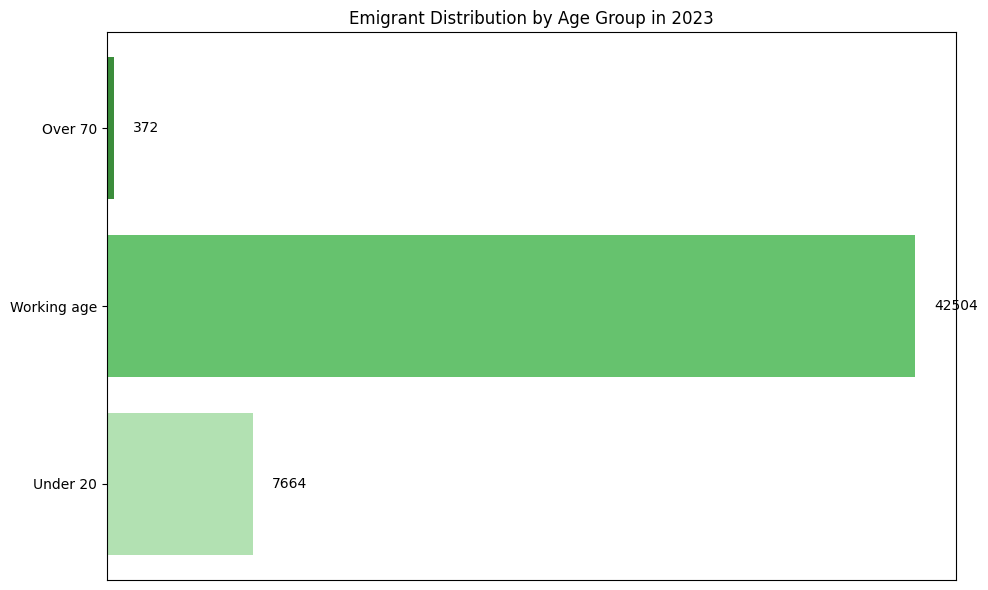

In [33]:
import matplotlib.pyplot as plt

# Data
categories = ['Under 20', 'Working age', 'Over 70']
values = [7664, 42504, 372]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart

colors = ['#b2e1b2', '#66c26e', '#3b8d3b']  # Lighter to darker shades of green

ax.barh(categories, values, color=colors)

# Add labels and title
ax.set_xlabel('Number of People')
ax.set_title('Emigrant Distribution by Age Group in 2023')
# Remove x-axis labels
ax.xaxis.set_visible(False)

# Add values on the bars for clarity
for i, v in enumerate(values):
    ax.text(v + 1000, i, str(v), color='black', va='center')

# Save the chart as a PNG file
plt.savefig('foreign_population_distribution.png', bbox_inches='tight')
# Show the chart
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>